## k-최근접 이웃 회귀모델
- 분류 : 범주형 데이터를 기준으로 분류하는 방식
- 회귀 : 연속형 데이터(숫자)를 예측하는 방식
- 회귀는 정해진 범주가 없으며, 임의의 수치값을 출력


- k-nn 알고리즘은 회귀에도 작동합니다.
- 작동방식은 분류와 유사, 예측하려는 데이터에 가장 가까운 이웃 갯수 선택
- 종속변수 target 데이터가 연속형 데이터를 사용하여 임의 수치값 예측

## 예측값 결정 방식
- 최근접 이웃의 갯수가 정해지면, 이웃한 숫자값들의 '평균'을 계산하여
- 평균과 같거나 평균에 가장 근사한 값의 이웃데이터가 예측값으로 결정
- (일반 책에서 나오는 개념으로, 실제는 이웃데이터의 평균값이 나온다고 보면 됩니다. 그래서 임의 결과괎이라고 함.

In [1]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
print(perch_length)
print('-------------------')
print(perch_weight)

# length(길이) : 특성 데이터(훈련데이터, train_data)
# weight(무게) : 정답 데이터(train_target)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
-------------------
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


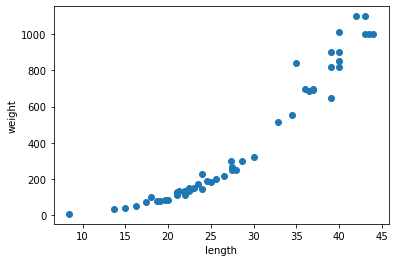

In [4]:
# 시각화를 통해 데이터의 형태 확인하기
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
'''
(해석) 
x축 length(길이)가 길어지게 되면 y축 weight(무게)가 커지는 현상을 보이고 있음
길이는 무게와 연관성이 있으며, 분포 형태는 선형에 가까우나 조금 라운드가 있음.
그러나, 선형적 모델을 이용하여 분석을 실시한 후
향후, 다항회귀모델을 통해 선형적 모델과 다항회귀모델 검증결과를 통해
선택하고자 함
'''

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [21]:
train_data, test_data, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

In [14]:
print(train_data)
print('-----------------')
print(train_target)
print('-----------------')
print(test_data)
print('-----------------')
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-----------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-----------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-----------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [32]:
# 샘플
test_arr = np.array([1,2,3,4])
print(test_arr)
print(test_arr.shape)     # 4*1

# 2행 2열로 만들기
print(test_arr.reshape(2,2))
print(test_arr.reshape(4,1))

[1 2 3 4]
(4,)
[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


In [34]:
# 1차원 데이터를 특정 행렬의 2차원으로 재생성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보면 됩니다
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 -1이 됩니다
# 전체 갯수를 모를 때는 -1 값을 사용하면 전체 행의 갯수를 체크합니다. **
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

# train_data = train_data.reshape(len(train_data), 1)
# test_data = test_data.reshape(len(test_data), 1)

## k-최근접이웃 회귀 클래스(모델) 생성

In [36]:
## 클래스(모델) 이름 : KNeighborsRegressor()
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [38]:
## 훈련데이터 학습 : 훈련모델 생성하기
knr.fit(train_data, train_target)

KNeighborsRegressor()

In [39]:
## 훈련모델 평가
# 분류에서는 score 결과값을 정확도라고 했다면,
# 회귀에서는 결정계소(R^2)라는 용어를 사용합니다.

## 회귀모델의 학습평가 결과 : 결정계수 이용
# - 회귀에서는 정확한 숫자를 맞히는 것은 불가능

# @ 결정계수의 범위
# - 0~1 사이의 값을 반환받음
# - 1에 가까울 수록 훈련이 잘 된 모델이라고 판단
# - 보통 0.95 이상을 좋다고 판단(기준은 아님)
# @ 결정계수 공식
# R^2 = 1-((target - 예측)^2의 합 / (target - 평균)^2의 합)
# - 예측값이 target값에 가까울수록 분자값이 0에 가까워지며, 1에 가까워짐

# 테스트 결정계수
knr.score(test_data, test_target)

0.992809406101064

## 오차 확인
- 일반적으로 계산에 의한 결정계수값을 봐서는 오차가 어느정도 인지 모릅니다
- 오차값 확인이 필요하다

In [40]:
# 오차를 확인하기 위해서는 예측을 먼저 선행해야 한다.
test_prediction = knr.predict(test_data)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [41]:
# 타깃값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error

In [42]:
# 오차값은 : 테스트데이터에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [ ]:
'''
(해석)
예측값이 평균적으로 19g 정도 타깃값과 차이가 있다는 것을 의미
- 차이 = 다르다는 의미는 아님
'''

In [44]:
# 테스트 결정계숙
knr.score(test_data, test_target)

0.992809406101064

In [43]:
# 훈련 결정계수
knr.score(train_data, train_target)

0.9698823289099254

In [ ]:
''' 
과소적합 나타남. 최대한 줄여야 함
'''

## 과대적합 vs 과소적합
- 훈련데이터와 테스트데이터를 각각 평가하여 비교했을 때
- 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
- 2. 과소적합 : 훈련데이터의 평가결과가 낮고, 테스트데이터의 평가가 높은 경우


### 과소적합이 발생하는 이유?
- 사용된 전체 데이터의 갯수가 너무 작은 경우에 주로 발생합니다.
- 데이터가 작으면 테스트데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우 발생

In [ ]:
## 과소적합 해소 방법
# - 훈련모델을 복잡하게 만들어서 평가결과를 높일 둣 있음
## 모델을 복잡하게 만드는 방법
# - 이웃의 개수를 작게하면 됩니다.
# - 이웃의 개수가 작아지면, 이웃의 비교대상이 조급 더 압축되기 때문에
# 훈련의 집중도가 높아짐. 정확도가 높아집니다.

## 이웃의 갯수 : 기본 5개
# - 복잡도를 높이는 방법은 이웃의 갯수를 줄여나가는 방법입니다.

In [49]:
## 이웃 갯수 정하기
# 최소 3개 이상 / 3, 5, 7 을 가장 많이 사용
knr.n_neighbors = 3

# 훈련
knr.fit(train_data, train_target)

# 테스트데이터 평가
print(knr.score(test_data, test_target))

# 훈련데이터 평가
print(knr.score(train_data, train_target))

0.9746459963987609
0.9804899950518966
